<a href="https://colab.research.google.com/github/CyprienCambus/TP_visualization/blob/main/TP_visualization_CAMBUS_HESSEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Plot data-points with matplotlib

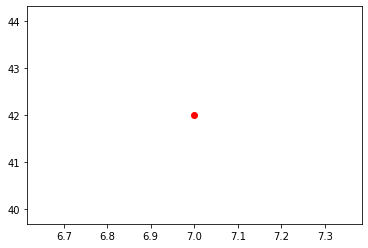

In [ ]:
# Plot single point
# 1st, create a figure
fig = plt.figure()
# then create an 'ax' in this figure
ax = fig.add_subplot(111)
# plot red point at x=7, y=42
ax.plot(7, 42, 'ro')
fig.set_facecolor('white')
fig.show()


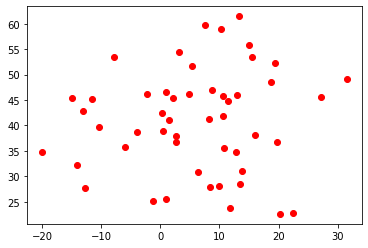

In [ ]:
# Plot multiple points
# create a center
center = (7, 42)
# sample scaled normal distribution
datapoints = 10 * np.random.randn(2, 50)
# re-center data
datapoints[0, :] += center[0]
datapoints[1, :] += center[1]
# plot red point for every data-point
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(datapoints[0, :], datapoints[1, :], 'ro')
fig.set_facecolor('white')
fig.show()


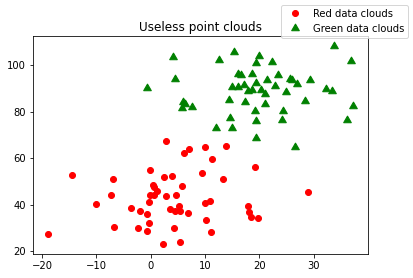

In [ ]:
# Use colors, legend and title

# Data-cloud1
# -----------
# create a center
center1 = (7, 42)
# sample scaled normal distribution
datacloud1 = 10 * np.random.randn(2, 50)
# re-center data
datacloud1[0, :] += center1[0]
datacloud1[1, :] += center1[1]

# Data-cloud2
# -----------
# create a center
center2 = (18, 92)
# sample scaled normal distribution
datacloud2 = 10 * np.random.randn(50, 50)
# re-center data
datacloud2[0, :] += center2[0]
datacloud2[1, :] += center2[1]

# plot data cloud1 with red points
# plot data cloud2 with green triangles
# data cloud1 is called "red data cloud"
# data cloud2 is called "green data cloud"
# title of the plot should be "useless point clouds"
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(datacloud1[0, :], datacloud1[1, :], 'ro', label='Red data clouds')
ax.plot(datacloud2[0, :], datacloud2[1, :], 'go',
        marker=(3, 0, 0), markersize=9, label='Green data clouds')
fig.legend(loc="upper right")
plt.title('Useless point clouds')
fig.set_facecolor('white')
plt.show()


# Plot curves with matplotlib

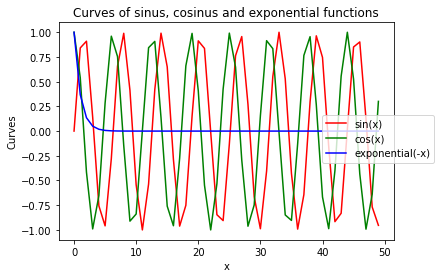

In [ ]:
# Some functions
curve1 = np.sin(np.arange(50))
curve2 = np.cos(np.arange(50))
curve3 = np.exp(-np.arange(50))
# plot functions
# colors, labels, title, legends...
fig = plt.figure()
ax = fig.add_subplot()
x_linespace = np.linspace(0, 49, 50)
ax.plot(x_linespace, curve1, 'r', label='sin(x)')
ax.plot(x_linespace, curve2, 'g', label='cos(x)')
ax.plot(x_linespace, curve3, 'b', label='exponential(-x)')
plt.xlabel('x')
fig.legend(loc="center right")
plt.ylabel('Curves')
plt.title('Curves of sinus, cosinus and exponential functions')
fig.set_facecolor('white')
fig.show()


## Let's use some real data

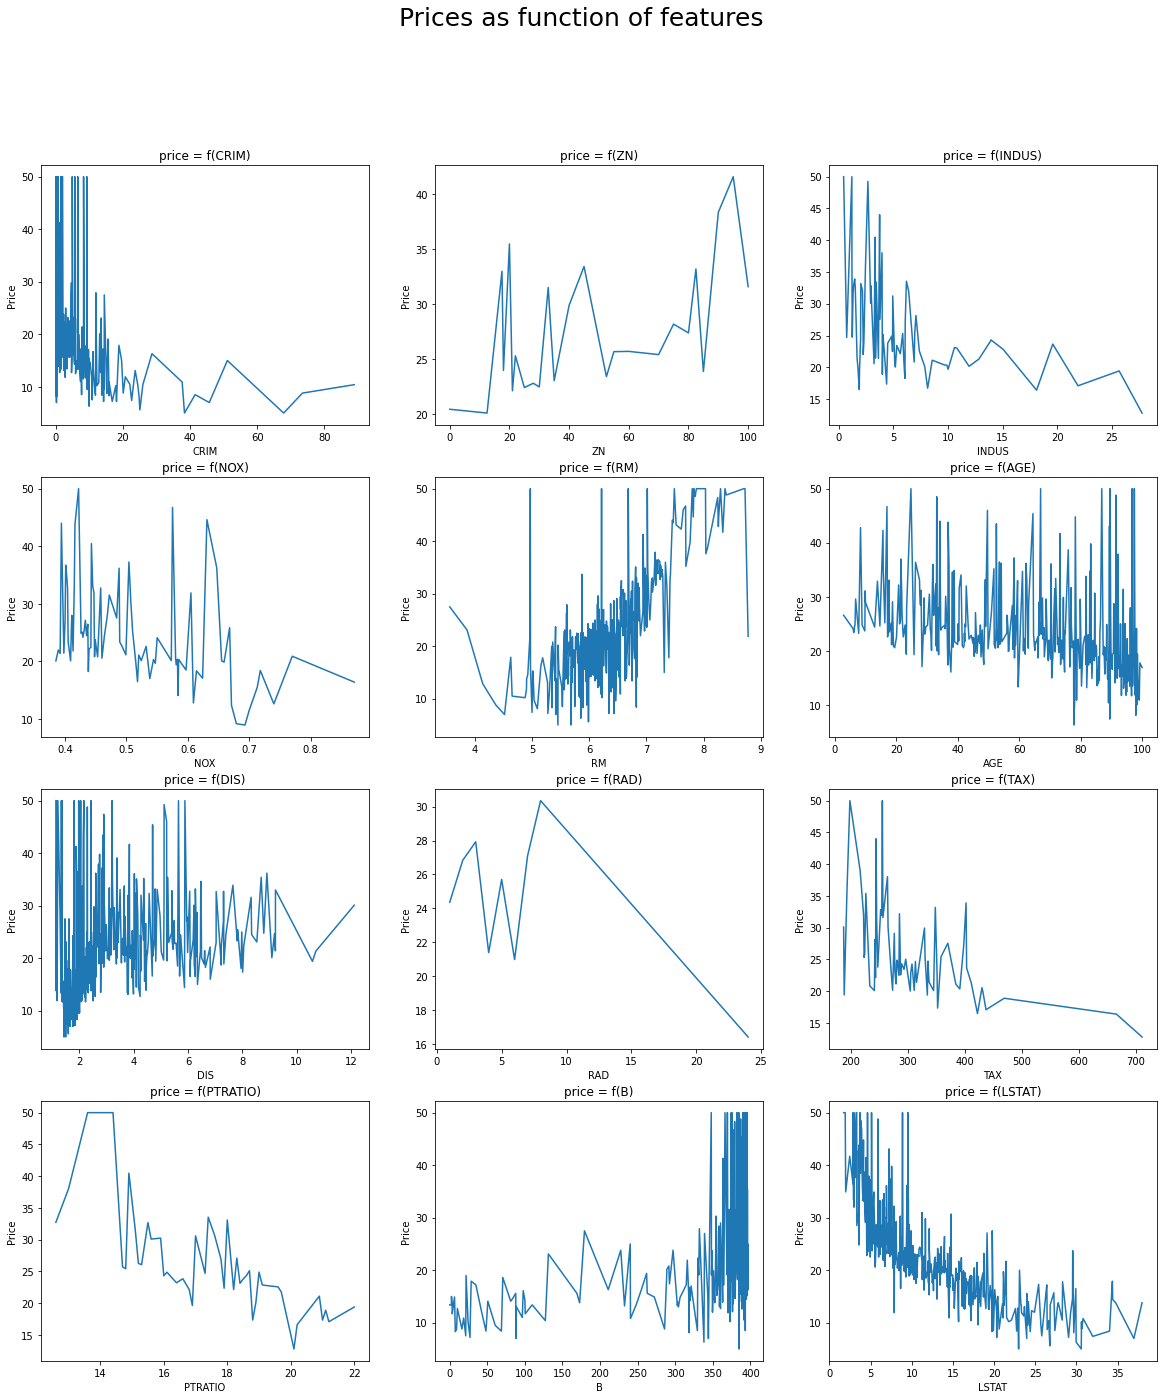

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()
# check the following attributes of boston: 
# - boston.target (prices)
# - boston.feature_names (name of descriptor's components)
# - boston.data (values of each feature for each house in the dataset)

data = boston.data
data = np.delete(data, 3, 1)

feature_names = boston.feature_names
feature_names = np.delete(feature_names, 3, 0)
# Here we delete the 4th column because it is a binary variable 

# In the case where we have many times the same values for a given feature, 
# we need to compute the mean values of the corresponding TARGETS values.


def get_mean_price(x, y):
    list_arg_sorted = np.argsort(x)
    x_sorted = np.sort(x)
    y_sorted = y[list_arg_sorted]
    output_y = []
    unique_values = list(set(x_sorted))
    unique_values.sort()
    for values in unique_values:
        list_arguments = np.where(x_sorted == values)[0]
        output_y.append(y_sorted[list_arguments].mean())
    return np.array(unique_values), np.array(output_y)

# Plot a curve price = f(feature) for every feature in the dataset
# titles and named axes plz
# You might need np.argsort at some point...
fig, axs = plt.subplots(4, 3, figsize=(20, 22))
idx = -1
Y = boston.target

for i in range(4):
    for j in range(3):
        idx += 1
        X = data[:, idx]
        transformed_data = get_mean_price(X, Y)
        axs[i, j].plot(transformed_data[0], transformed_data[1])
        axs[i, j].set_title('price = f('+str(feature_names[idx])+')')
        axs[i, j].set_xlabel(feature_names[idx])
        axs[i, j].set_ylabel('Price')


fig.set_facecolor('white')
fig.suptitle('Prices as function of features', size=25)  
fig.show()


# Read data from files with pandas and plot with seaborn

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# read csv file with pandas
# csv file: euclidean_training.csv
data = pd.read_csv("https://github.com/CyprienCambus/TP_visualization/raw/main/euclidean_training.csv")
# print the resulting dataframe
# We delete the 1st unnamed colum
data = data.drop([data.columns[0]], axis=1)
data.head(5)


accuracies  epochs  distance parameter  experiment
0    0.696591       0  0.042117     k=0,5           0
1    0.851136       1  0.044463     k=0,5           0
2    0.896591       2  0.046504     k=0,5           0
3    0.912500       3  0.047552     k=0,5           0
4    0.922727       4  0.048296     k=0,5           0

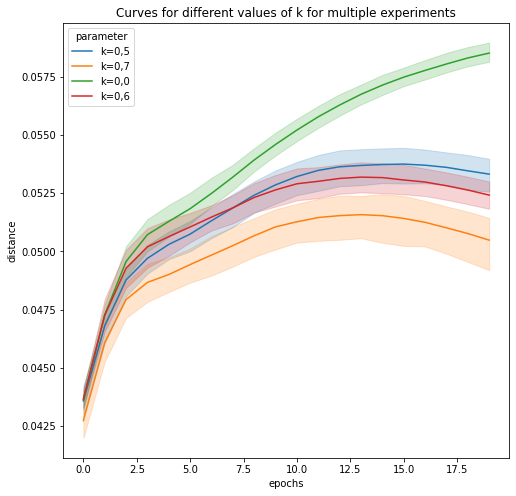

In [ ]:
# create the matplotlib object
fig, ax = plt.subplots(figsize=(8, 8))
# plot with sns
# plot distance = f(epochs)
# one color = one value of parameter k
# for every value of k, multiple experiments were run
# (i.e. multiple curves distance=f(epochs) exist)
# seaborn plots the average with transparency for dispersion
ax = sns.lineplot(data=data, x="epochs", y="distance", hue="parameter")
ax.set_title('Curves for different values of k for multiple experiments')
fig.set_facecolor('white')
fig.show()


In [ ]:
!pip install smopy

# Plot geographical data

In [ ]:
import os, ssl
import smopy
from matplotlib import pyplot as plt
import numpy as np
import json
import urllib.request

# The following might be unnecessary (or even produce an error...)
# comment if necessary
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
    

In [ ]:
# Here is a convenient object to create maps (geographical).
class Map(object):

    def __init__(self, latmin, latmax, longmin, longmax, zoom):
        self.latmin = latmin
        self.latmax = latmax
        self.longmin = longmin
        self.longmax = longmax
        self.zoom = zoom
        self.smopymap = smopy.Map((latmin, latmax, longmin, longmax), z=zoom)
    
    def get_image(self):
        return np.array(self.smopymap.img)
    
    def to_image_pixels(self, lat, long):
        return [int(k) for k in self.smopymap.to_pixels(lat, long)]
    

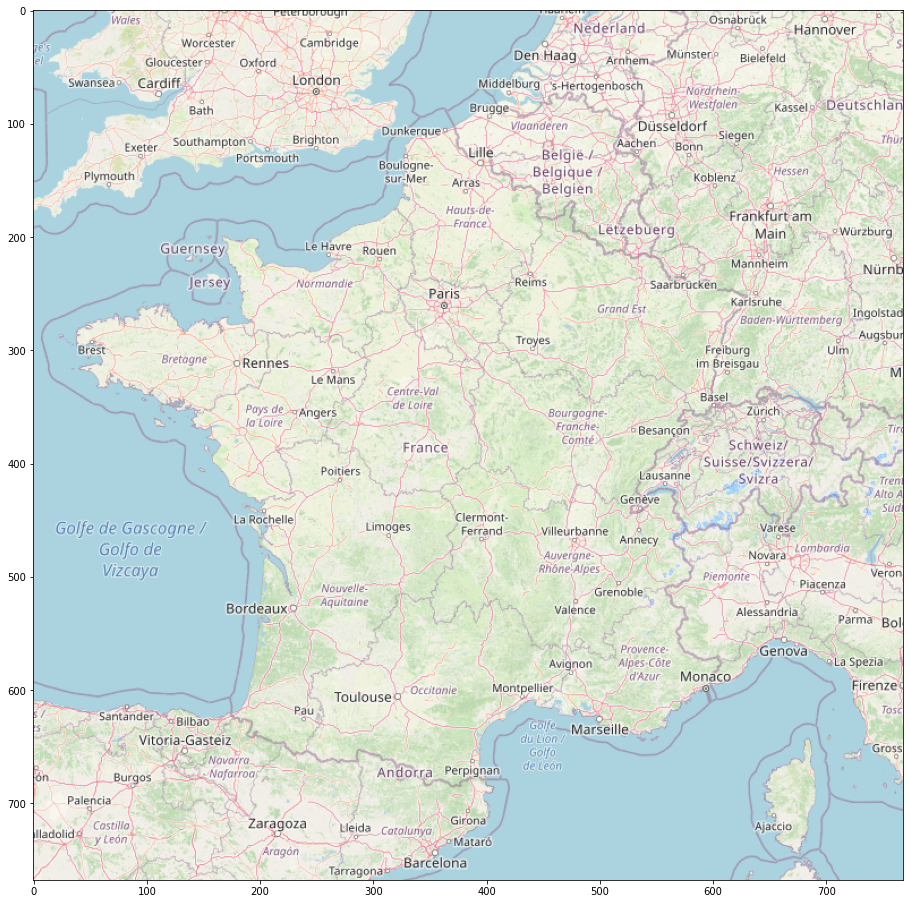

In [ ]:
# plot an image with matplotlib
my_map = Map(45., -1., 48.9, 5.5, 6)
image = my_map.get_image()
# create figure
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax
plt.imshow(image)
plt.show()


(768, 768, 3)
362 260


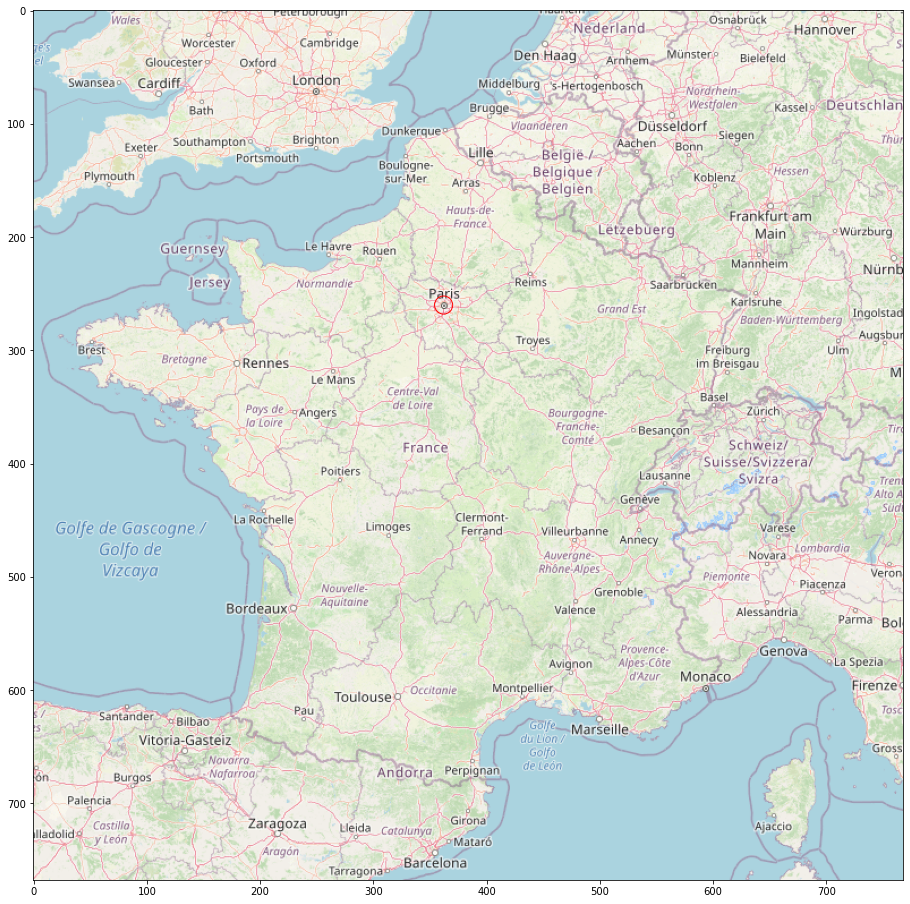

In [ ]:
# show image structure
print(image.shape)
# change color of a pixel in the image
Paris_latitude = 48.86151
Paris_longitude = 2.33474
x, y = my_map.to_image_pixels(Paris_latitude, Paris_longitude)
print(x, y)
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)

# show image on the ax with a red circle placed on Paris
circle_paris = plt.Circle((x, y), 8, color='r', fill=False)

# add the red circle
ax.add_artist(circle_paris)

plt.imshow(image)
plt.show()


In [ ]:
# load a json file
# file is: fr-esr-principaux-etablissements-enseignement-superieur.json
import urllib.request, json 
with urllib.request.urlopen("https://github.com/CyprienCambus/TP_visualization/raw/main/fr-esr-principaux-etablissements-enseignement-superieur.json") as url:
    data = json.loads(url.read().decode())
    
# data est une liste qui contient des dictionnaires


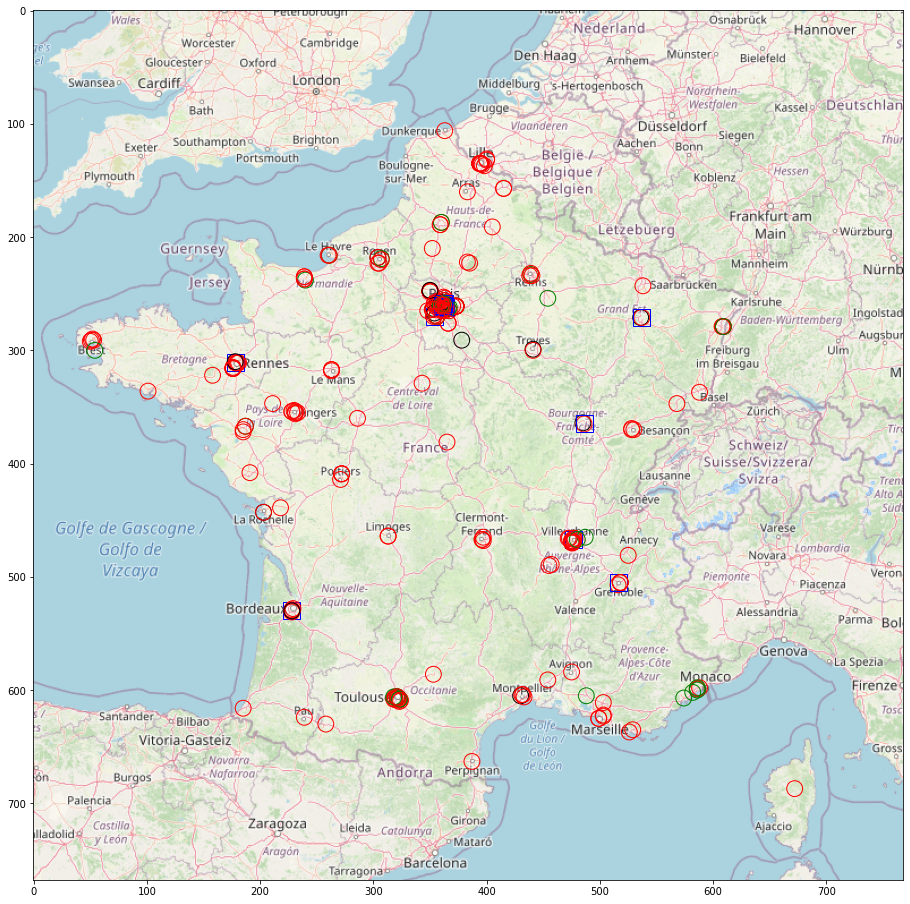

In [ ]:
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)

# plot schools with circles
# set a different color/shape for 'artistique', 'ingenieur' and 'commerce'
# labels
for dico_ville in data:
    if 'coordonnees' in dico_ville['fields'].keys():
        x, y = my_map.to_image_pixels(dico_ville['fields']['coordonnees'][0],
                                      dico_ville['fields']['coordonnees'][1])

    if 'art' in dico_ville['fields']['type_d_etablissement']:
        circle_school = plt.Circle((x, y), 7, color='green', fill=False)
        ax.add_artist(circle_school)

    elif 'commerce' in dico_ville['fields']['type_d_etablissement']:
        circle_school = plt.Circle((x, y), 7, color='black', fill=False)
        ax.add_artist(circle_school)

    elif 'grand' in dico_ville['fields']['type_d_etablissement'].lower():
        circle_school = plt.Rectangle((x - 7.5, y - 7.5), 15, 15, angle=0.0,
                                      fill=False, color='blue')
        ax.add_artist(circle_school)
    else:
        circle_school = plt.Circle((x, y), 7, color='r', fill=False)
        ax.add_artist(circle_school)

# show image on the ax
plt.imshow(image)
plt.show()


# Charts

In [ ]:
# Load csv: users.csv
# plot a pie chart of nationality of the users
data_users = pd.read_csv("https://github.com/CyprienCambus/TP_visualization/raw/main/users.csv")
data_users.head()

user_id first_name last_name  gender  birth_date        country
0        1    Janifer    Lagadu  Female  1940-08-09  United States
1        2      Bruis   Danilov    Male  1966-05-28         Brazil
2        3       Omar  Spinozzi    Male  1977-08-28          China
3        4        Mag   Kennedy  Female  1963-11-11          China
4        5     Gerome    Lushey    Male  1990-06-08         Brazil

In [ ]:
res = data_users.groupby('country').sum()
print(res['user_id'].index)
print(res['user_id'].values)
print(sum(res['user_id'].values))


Index(['Brazil', 'China', 'France', 'Germany', 'Japan', 'New Zealand',
       'Nigeria', 'United States'],
      dtype='object', name='country')
[ 984 2776  611   91  171   79  128  210]
5050


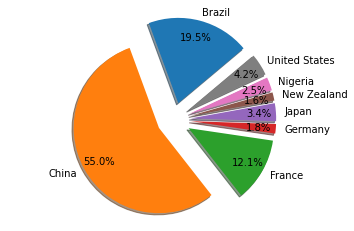

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = res['user_id'].index

# the total number of users
n = sum(res['user_id'].values)

# the proportion in percentage of each country
sizes = [100*val/n for val in res['user_id'].values]

# only "explode" the 2nd slice
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=40, pctdistance=0.8)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

plt.show()

In [ ]:
# Load uncertainty.csv
# create violin plots with seaborn
# 'erroneous' next to 'correct' densities
uncert = pd.read_csv("https://github.com/CyprienCambus/TP_visualization/raw/main/uncertainty.csv")
uncert.tail()


prediction  uncertainty
20148  erroneous     0.096348
20149  erroneous     0.178221
20150  erroneous     0.209282
20151  erroneous     0.107856
20152  erroneous     0.170288

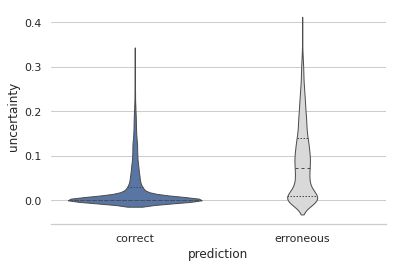

In [ ]:
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=uncert, x="prediction", y="uncertainty",
               split=True, inner="quart", linewidth=1,
               palette={"correct": "b", "erroneous": ".85"})

sns.despine(left=True)
